In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('C:/Users/user/Desktop/Actual work/Test work task/Main_data.xlsx', sheet_name='Dataset')

data

,ids,gender,last_connection,x1,x2,x3,t1,t2
0,1,F,2015-04-27,37.796189,292.189338,85.871732,1102.896732,1814.852022
1,2,M,2015-04-27,44.523437,294.989423,96.432040,1116.845895,1679.957691
2,3,F,2015-02-16,90.593723,298.219531,96.915476,1290.882244,1841.987889
3,4,M,2015-04-18,44.055440,303.041350,96.422230,1173.231390,1712.165400
4,5,F,2015-03-08,9.753165,298.005909,95.192099,1036.007131,1841.026590
...,...,...,...,...,...,...,...,...
9995,9996,F,2015-04-23,80.799213,301.576117,96.079032,1257.325411,1857.092524
9996,9997,M,2015-03-16,96.708871,308.761274,94.555557,1305.579678,1735.045096
9997,9998,M,2015-02-28,74.978155,293.047098,96.981146,1225.027722,1672.188392
9998,9999,M,2015-04-11,57.177898,306.430133,93.671787,1165.217414,1725.720533


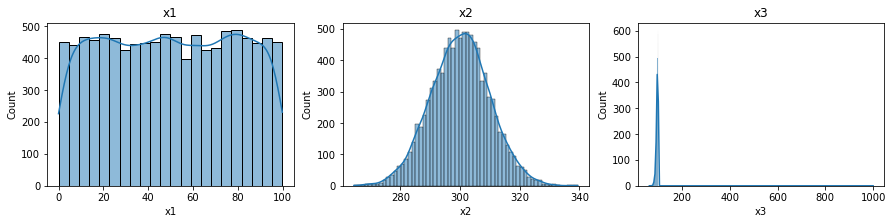

In [43]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(data['x1'], ax = ax[0], kde = True, legend = False)
ax[0].set_title("x1")
sns.histplot(data['x2'], ax = ax[1], kde = True, legend = False)
ax[1].set_title("x2")
sns.histplot(data['x3'], ax = ax[2], kde = True, legend = False)
ax[2].set_title("x3")
plt.show()

In [44]:
for x in ['x2']:
    q_75, q_25 = np.percentile(data.loc[:, x], [75, 25])
    IQR = q_75 - q_25

    max_value = q_75 + (1.5 * IQR)
    min_value = q_25 - (1.5 * IQR)

    data.loc[data[x] < min_value, x] = np.nan
    data.loc[data[x] > max_value, x] = np.nan

In [45]:
for x in ['x3']:
    q_75, q_25 = np.percentile(data.loc[:, x], [75, 25])
    IQR = q_75 - q_25

    max_value = q_75 + (1.5 * IQR)
    min_value = q_25 - (1.5 * IQR)

    data.loc[data[x] < min_value, x] = np.nan
    data.loc[data[x] > max_value, x] = np.nan

In [46]:
data.isnull().sum()

ids                  0
gender               0
last_connection    100
x1                   0
x2                  82
x3                 323
t1                   0
t2                   0
dtype: int64

In [47]:
clear_data = data.dropna()
clear_data.isnull().sum()

ids                0
gender             0
last_connection    0
x1                 0
x2                 0
x3                 0
t1                 0
t2                 0
dtype: int64

In [48]:
clear_data

,ids,gender,last_connection,x1,x2,x3,t1,t2
0,1,F,2015-04-27,37.796189,292.189338,85.871732,1102.896732,1814.852022
1,2,M,2015-04-27,44.523437,294.989423,96.432040,1116.845895,1679.957691
2,3,F,2015-02-16,90.593723,298.219531,96.915476,1290.882244,1841.987889
3,4,M,2015-04-18,44.055440,303.041350,96.422230,1173.231390,1712.165400
4,5,F,2015-03-08,9.753165,298.005909,95.192099,1036.007131,1841.026590
...,...,...,...,...,...,...,...,...
9995,9996,F,2015-04-23,80.799213,301.576117,96.079032,1257.325411,1857.092524
9996,9997,M,2015-03-16,96.708871,308.761274,94.555557,1305.579678,1735.045096
9997,9998,M,2015-02-28,74.978155,293.047098,96.981146,1225.027722,1672.188392
9998,9999,M,2015-04-11,57.177898,306.430133,93.671787,1165.217414,1725.720533


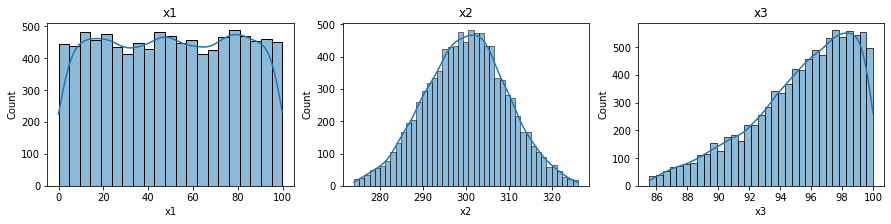

In [49]:
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(clear_data['x1'], ax = ax1[0], kde = True, legend = False)
ax1[0].set_title("x1")
sns.histplot(clear_data['x2'], ax = ax1[1], kde = True, legend = False)
ax1[1].set_title("x2")
sns.histplot(clear_data['x3'], ax = ax1[2], kde = True, legend = False)
ax1[2].set_title("x3")
plt.show()

In [50]:
clear_data.describe()

,ids,x1,x2,x3,t1,t2
count,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000
mean,5000.213948,50.146657,300.061119,95.383469,1175.165706,1769.203379
std,2883.459176,28.944061,9.550066,3.323918,118.638738,85.672593
min,1.000000,0.004004,273.944837,85.537649,897.883743,1595.779347
25%,2509.500000,24.717666,293.451353,93.369237,1085.140073,1696.177099
50%,4996.000000,50.055395,300.236033,96.042558,1176.296465,1752.196752
75%,7495.500000,75.532542,306.505021,98.059589,1264.353742,1846.780449
max,10000.000000,99.904798,326.058156,99.999098,1449.617809,1967.261700


In [51]:
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

x1_col = pd.DataFrame(clear_data.x1)
scale_x1_col = minmax_scaling(x1_col, columns = ['x1'])

x2_col = pd.DataFrame(clear_data.x2)
scale_x2_col = minmax_scaling(x2_col, columns = ['x2'])

x3_col = pd.DataFrame(clear_data.x3)
scale_x3_col = minmax_scaling(x3_col, columns = ['x3'])

work_data = pd.DataFrame({
    'Scale_x1' : scale_x1_col['x1'],
    'Scale_x2' : scale_x2_col['x2'],
    'Scale_x3' : scale_x3_col['x3']
})

work_data

,Scale_x1,Scale_x2,Scale_x3
0,0.378297,0.350093,0.023102
1,0.445636,0.403824,0.753340
2,0.906797,0.465806,0.786769
3,0.440952,0.558332,0.752662
4,0.097588,0.461707,0.667599
...,...,...,...
9995,0.808754,0.530215,0.728930
9996,0.968009,0.668091,0.623583
9997,0.750486,0.366552,0.791311
9998,0.572307,0.623359,0.562470


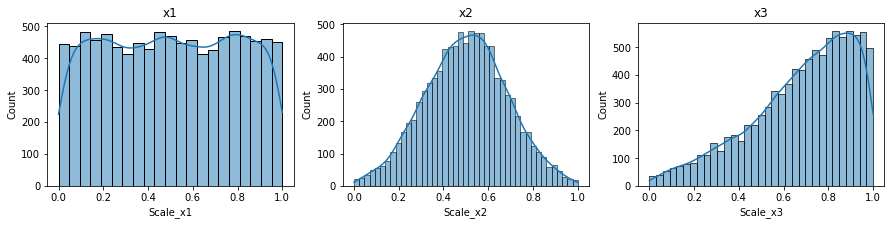

In [52]:
fig2, ax2 = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(work_data['Scale_x1'], ax = ax2[0], kde = True, legend = False)
ax2[0].set_title("x1")
sns.histplot(work_data['Scale_x2'], ax = ax2[1], kde = True, legend = False)
ax2[1].set_title("x2")
sns.histplot(work_data['Scale_x3'], ax = ax2[2], kde = True, legend = False)
ax2[2].set_title("x3")
plt.show()

In [36]:
#positive_x2 = work_data.loc[work_data.Scale_x2 > 0].Scale_x2
#index_of_positive_x1 = work_data.loc[work_data.Scale_x1 > 0].Scale_x1
#index_of_positive_x3 = work_data.loc[work_data.Scale_x3 > 0].Scale_x3

#norm_x1_column = pd.Series(stats.boxcox(index_of_positive_x1)[0], index = index_of_positive_x1, name = 'Scale_x1')
#norm_x3_column = pd.Series(stats.boxcox(index_of_positive_x3)[0], index = index_of_positive_x3, name = 'Scale_x3')

In [38]:
#work_data = work_data.drop(labels=0, axis=0)
#work_data['Scale_x1'] = norm_x1_column.values
#work_data['Scale_x2'] = positive_x2.values
#work_data['Scale_x3'] = norm_x3_column.values

In [53]:
work_data

,Scale_x1,Scale_x2,Scale_x3
0,0.378297,0.350093,0.023102
1,0.445636,0.403824,0.753340
2,0.906797,0.465806,0.786769
3,0.440952,0.558332,0.752662
4,0.097588,0.461707,0.667599
...,...,...,...
9995,0.808754,0.530215,0.728930
9996,0.968009,0.668091,0.623583
9997,0.750486,0.366552,0.791311
9998,0.572307,0.623359,0.562470


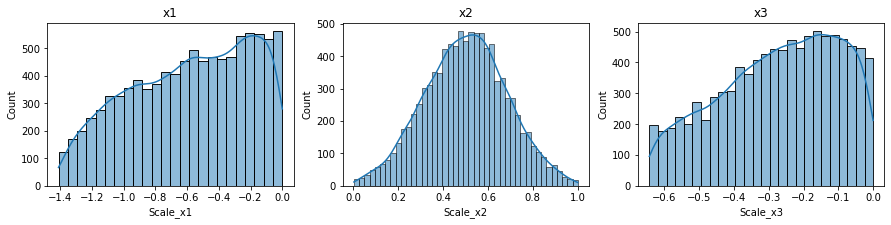

In [40]:
#fig3, ax3 = plt.subplots(1, 3, figsize=(15, 3))
#sns.histplot(work_data['Scale_x1'], ax = ax3[0], kde = True, legend = False)
#ax3[0].set_title("x1")
#sns.histplot(work_data['Scale_x2'], ax = ax3[1], kde = True, legend = False)
#ax3[1].set_title("x2")
#sns.histplot(work_data['Scale_x3'], ax = ax3[2], kde = True, legend = False)
#ax3[2].set_title("x3")
#plt.show()

In [89]:
X = [work_data['Scale_x1'].values, work_data['Scale_x2'].values, work_data['Scale_x3'].values]
Y = clear_data['t1'].values
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, Y, rcond=None)[0]
print(linreg)

[ 3.52300287e+02  5.42304650e+00 -4.81001245e-02  9.95652592e+02]


In [100]:
k1 = round(linreg[0], 5)
k2 = round(linreg[1], 5)
k3 = round(linreg[2], 5)
k4 = round(linreg[3], 5)
print('k1 = {}, k2 = {}, k3 = {}, k4 = {}'.format(k1, k2, k3, k4))

k1 = 352.30029, k2 = 5.42305, k3 = -0.0481, k4 = 995.65259


In [105]:
predict_values = work_data['Scale_x1'] * k1 + work_data['Scale_x2'] * k2 + work_data['Scale_x3'] * k3 + k4

compare_data = pd.DataFrame({
    'Predict' : predict_values.values,
    'Real' : clear_data.t1
})

percentile_error = round(abs(compare_data['Real'] - compare_data['Predict']) / compare_data['Real'] * 100, 5)

compare_data['Error'] = percentile_error.astype(str) + '%'

compare_data

,Predict,Real,Error
0,1130.824244,1102.896732,2.5322%
1,1154.804154,1116.845895,3.3987%
2,1317.605605,1290.882244,2.07016%
3,1153.991698,1173.231390,1.63989%
4,1032.504768,1036.007131,0.33806%
...,...,...,...
9995,1283.417332,1257.325411,2.07519%
9996,1340.275534,1305.579678,2.65751%
9997,1261.998807,1225.027722,3.01798%
9998,1200.629860,1165.217414,3.03913%


In [107]:
Indicators_1 = pd.Series([str(round(percentile_error.max(), 3)) + '%', str(round(percentile_error.min(), 3)) + '%', 
                        str(round(percentile_error.mean(), 3)) + '%', str(round(percentile_error.median(), 3)) + '%', 
                        str(round(percentile_error.std(), 3)) + '%'],
                      index = ['Maximum', 'Minimum', 'Mean', 'Median', 'Standard deviation'], name = 'Indicators')

Indicators_1

Maximum               11.491%
Minimum                0.001%
Mean                   4.509%
Median                  4.47%
Standard deviation     2.674%
Name: Indicators, dtype: object